In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dog_data = pd.read_table('dog_data.txt')
chimp_data = pd.read_table('chimp_data.txt')

In [3]:
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [4]:
chimp_data['class'].unique()

array([4, 6, 0, 1, 3, 2, 5], dtype=int64)

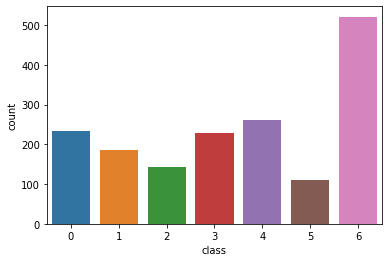

In [5]:
# Checking for a Balanced Dataset
sns.countplot(chimp_data['class'])

### Feature Engineering

In [6]:
# function to convert sequence strings into k-mer words, default size = 6 (hexamer words)
def getKmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence) - size + 1)]


In [7]:
chimp_data['words'] = chimp_data.apply(lambda x: getKmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)

In [8]:
chimp_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
3,4,"[atggcc, tggcct, ggcctc, gcctcg, cctcgc, ctcgc..."
4,6,"[atgggc, tgggca, gggcag, ggcagc, gcagcg, cagcg..."


In [9]:
# Similarly for dog data
dog_data['words'] = dog_data.apply(lambda x: getKmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)

In [10]:
dog_data.head()

,class,words
0,4,"[atgcca, tgccac, gccaca, ccacag, cacagc, acagc..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,6,"[atggaa, tggaaa, ggaaac, gaaaca, aaacac, aacac..."
3,6,"[atgtgc, tgtgca, gtgcac, tgcact, gcacta, cacta..."
4,0,"[atgagc, tgagcc, gagccg, agccgg, gccggc, ccggc..."


Converting the list of words to string for Bag of Words

In [11]:
chimp_text = list(chimp_data['words'])
dog_text = list(dog_data['words'])

In [12]:
# For Cat
for i in range(len(chimp_text)):
    chimp_text[i] = " ".join(chimp_text[i])

In [13]:
chimp_text[1]

'atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaaat aaaatc aaatct aatcta atctat tctatt ctattc tattcg attcgc ttcgct tcgctt cgcttc gcttca cttcat ttcatt tcattc cattcg attcgc ttcgct tcgctg cgctgc gctgcc ctgccc tgcccc gccccc ccccca ccccac cccaca ccacaa cacaat acaatc caatcc aatcct atccta tcctag cctagg ctaggc taggct aggctt ggctta gcttac cttacc ttaccc tacccg acccgc cccgcc ccgccg cgccgc gccgca ccgcag cgcagt gcagta cagtac agtact gtacta tactaa actaat ctaatc taatca aatcat atcatt tcattc cattct attcta ttctat tctatt ctattc tattcc attccc ttcccc tccccc cccccc ccccct cccctc ccctct cctcta ctctac tctact ctactg tactgg actggt ctggtc tggtcc ggtccc gtcccc tcccca ccccac cccact ccactt cacttc acttct cttcta ttctaa tctaaa ctaaac taaaca aaacat aacatc acatct catctc atctca tctcat ctcatc tcatca catcaa atcaac tcaaca caacaa aacaac acaacc caaccg aaccga accgac ccgact cgacta gactaa actaat ctaatt taatta aattac attacc ttacca taccac accacc ccaccc caccca acccaa cccaac ccaaca caacaa aacaat acaatg caatga aatgac atgact tgacta gacta

In [14]:
# For Dog
for i in range(len(dog_text)):
    dog_text[i] = " ".join(dog_text[i])

### Now we will apply the BAG of WORDS using CountVectorizer using NLP

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))

In [16]:
X = cv.fit_transform(chimp_text)
y = chimp_data['class']

In [17]:
print(X.shape)
print(y.shape)

(1682, 229684)
(1682,)


In [18]:
# Train_test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [19]:
X_train.shape

(1261, 229684)

### Multinomial Naive Bayes

In [20]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [21]:
y_pred = classifier.predict(X_test)

In [22]:
classifier.score(X_test, y_test)

0.9121140142517815

#### Various Accuracy Scores

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  0  1  2  3  4  5  6
Actual                        
0          2  5  2  1  3  0  6
1          2  2  2  2  0  1  0
2          1  1  0  2  0  0  1
3          1  1  1  5  0  1  5
4          2  3  1  5  1  0  7
5          0  0  1  1  1  0  6
6          3  2  4  2  3  5  9
accuracy = 0.912 
precision = 0.922 
recall = 0.912 
f1 = 0.912


### Similarly for Dog

In [24]:
X = cv.fit_transform(dog_text)
y = dog_data['class']

In [25]:
# Train_test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [26]:
## Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
# Testing accuracy of the model

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1
accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, f1))

Confusion matrix

Predicted  0  1  2  3  4  5   6
Actual                         
0          3  4  0  1  1  0   5
1          0  0  0  0  0  0   2
2          2  0  0  0  0  0   0
3          0  3  1  1  0  0   2
4          1  0  0  1  0  1   1
5          0  0  0  0  0  0   2
6          4  0  2  0  1  1  10
accuracy = 0.727 
precision = 0.751 
recall = 0.727 
f1 = 0.712
